Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.2.1
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 10, 1, 8, 13, 3, 10, 11, 3, 7, 7…
$ Glucose                  <dbl> 85, 89, 116, 115, 139, 103, 99, 145, 88, 122,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 80, 30, 84, 82, 58, 78, 76, 64…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 0, 19, 11, 31, 0, 25, 18…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 0, 110, 54, 0, 0, 70, 0, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 27.1, 43.3, 35.4, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 1.441, 0.183, 0.3…
$ Age                      <dbl> 31, 21, 30, 29, 57, 33, 50, 57, 22, 45, 35, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

> **Matt's Response**
>
> Looks like `Outcome` would be a good label for this model, since it indicates whether the patient has diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name              | Description                                                                  |
| :----------------------- | :--------------------------------------------------------------------------- |
| Pregnancies              | Number of times pregnant                                                     |
| **Glucose**              | **Plasma glucose concentration a 2 hours in an oral glucose tolerance test** |
| BloodPressure            | Diastolic blood pressure (mm Hg)                                             |
| SkinThickness            | Triceps skin fold thickness (mm)                                             |
| Insulin                  | 2-Hour serum insulin (mu U/ml)                                               |
| **BMI**                  | **Body mass index** ($weight/height^2 \; [kg/m^2]$)                          |
| DiabetesPedigreeFunction | Diabetes pedigree function                                                   |
| Age                      | Age (years)                                                                  |
| Outcome                  | Class variable (0 or 1) 268 of 768 are 1, the others are 0                   |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

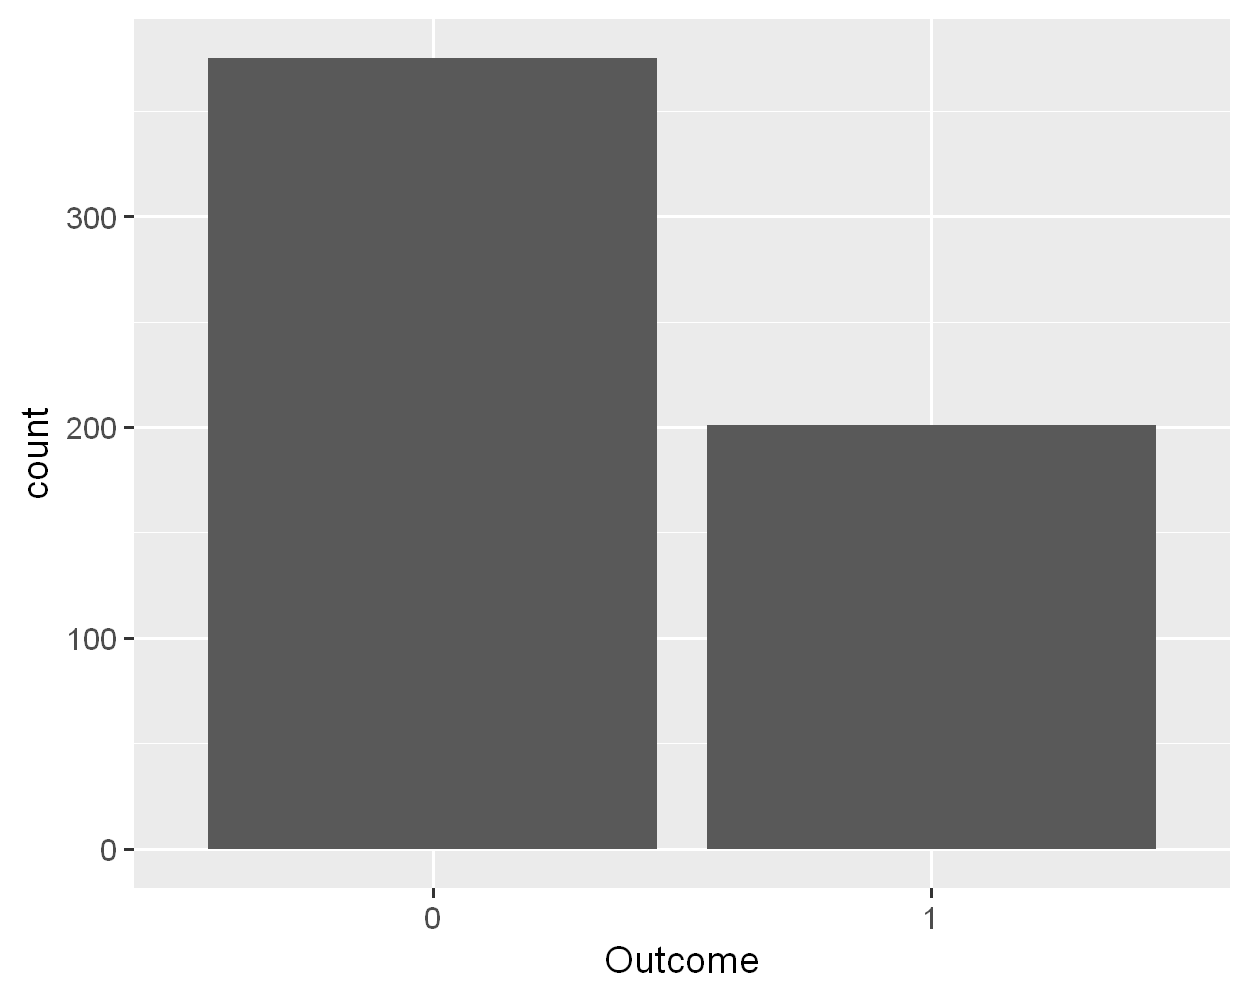

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [5]:
diabetes |>
  count(Outcome) |>
  mutate(percent = n / sum(n))

Outcome,n,percent
<fct>,<int>,<dbl>
0,500,0.6510417
1,268,0.3489583


> **Matt's Response**
>
> These don't have balanced data -- I would say it it moderately unbalanced.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
  select(Outcome, Glucose, BMI) |>
  pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

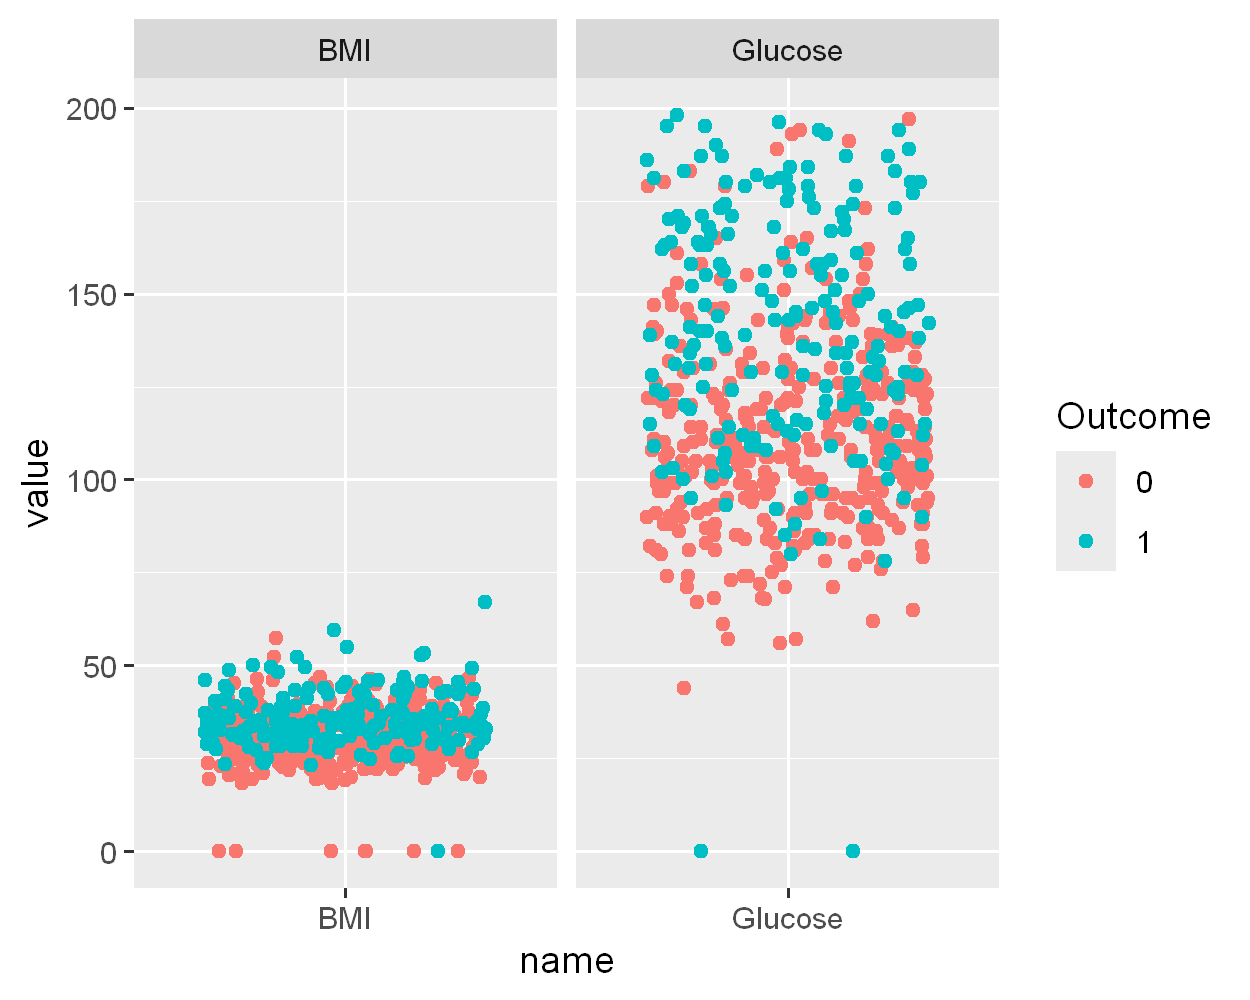

In [7]:
ggplot(plot_df, aes(x = name, y = value, color = Outcome)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

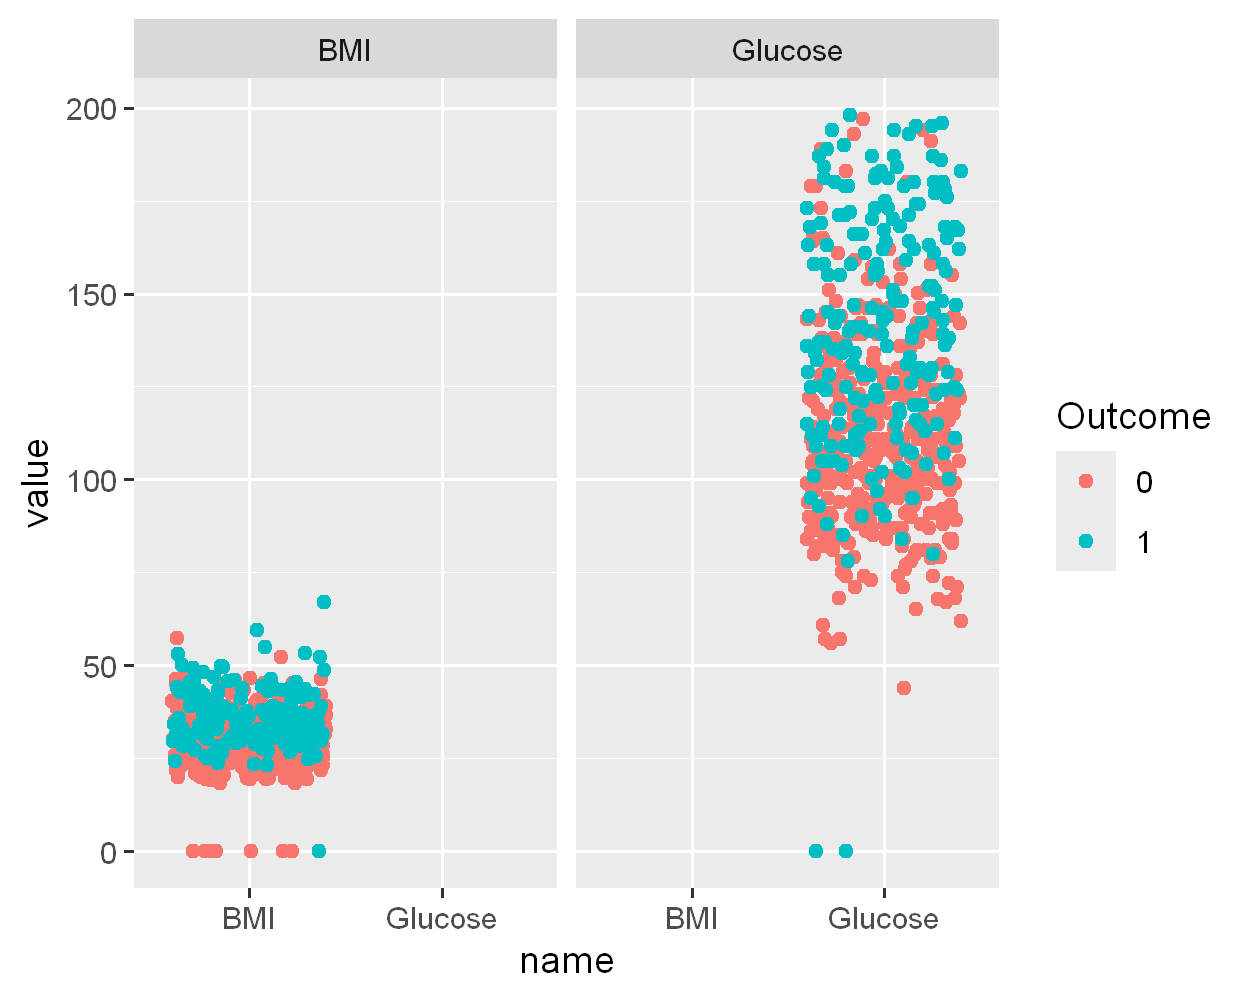

In [8]:
ggplot(plot_df, aes(x = name, y = value, color = Outcome)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2)

> **Matt's Response:**
>
> Looks like they try to put both name labels on both charts, instead of
> letting the `facet_wrap` spread the labels across each chart.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [9]:
model <- logistic_reg(engine = "glm") |>
  fit(Outcome ~ BMI + Glucose, diabetes_train)

tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.58303853,0.694961863,-10.911446,1.016273e-27
BMI,0.08826028,0.015298599,5.769174,7.966106e-09
Glucose,0.03235453,0.003669021,8.818301,1.162095e-18


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [10]:
diabetes_test_wPred <- augment(model, diabetes_test)
glimpse(diabetes_test_wPred)

Rows: 192
Columns: 12
$ .pred_class              <fct> 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, …
$ .pred_0                  <dbl> 0.18501346, 0.97176967, 0.66939574, 0.2335089…
$ .pred_1                  <dbl> 0.814986543, 0.028230330, 0.330604257, 0.7664…
$ Pregnancies              <dbl> 2, 8, 4, 1, 7, 3, 7, 1, 5, 5, 6, 4, 9, 7, 5, …
$ Glucose                  <dbl> 197, 125, 110, 189, 100, 126, 196, 97, 117, 1…
$ BloodPressure            <dbl> 70, 96, 92, 60, 0, 88, 90, 66, 92, 75, 92, 60…
$ SkinThickness            <dbl> 45, 0, 0, 23, 0, 41, 0, 15, 0, 26, 0, 33, 37,…
$ Insulin                  <dbl> 543, 0, 0, 846, 0, 235, 0, 140, 0, 0, 0, 192,…
$ BMI                      <dbl> 30.5, 0.0, 37.6, 30.1, 30.0, 39.3, 39.8, 23.2…
$ DiabetesPedigreeFunction <dbl> 0.158, 0.232, 0.191, 0.398, 0.484, 0.704, 0.4…
$ Age                      <dbl> 53, 54, 30, 59, 32, 27, 41, 22, 38, 60, 28, 3…
$ Outcome                  <fct> 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [12]:
diabetes_test_wPred = augment(model, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 113  36
         1  12  31

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

> **Matt's Response:**
>
> How many individuals had diabetes in your test data?
> - **From the `Truth=1` Column, I see that $31 + 36 = 67$ individuals actually
>   have diabetes.**
> 
> Of those that actually had diabetes, how many were predicted to have diabetes
> by your model?
> - **Of the 67 with diabetes, 31 were predicted to have diabetes, giving a
>   recall of $36 / 67 = 53.7\%$ (Not great)**
> 
> How many individuals predicted to have diabetes did not have diabetes?
> - **From the `Prediction=1` column, it looks like there were a total of
>   $17 + 36 = 53$ positive predictions, and $17 / 53 = 32.1\%$ of them were
>   false positives.**